# Convolutional Neural Network

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
from random import randint
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Data Preparation

The images included in the data/cats-and-dogs directory are a random subset of the full cat and dog data set from the following Kaggle competition: http://www.kaggle.com/dogs-vs-cats/data

In [2]:
train_n=6000
valid_n=1000
test_n=3000

In [3]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\dog') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train\\dog')
    
    for i in random.sample(glob.glob('dog*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\dog')  
os.chdir('../../')

In [4]:
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\cat') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train\\cat')
    
    for i in random.sample(glob.glob('cat*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\cat')  
os.chdir('../../')

In [5]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\dog') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\valid\\dog')
    
    for i in random.sample(glob.glob('dog*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\dog')  
os.chdir('../../')

In [6]:
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\cat') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\valid\\cat')
    
    for i in random.sample(glob.glob('cat*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\cat')  
os.chdir('../../')

In [7]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\dog') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\test\\dog')
    
    for i in random.sample(glob.glob('dog*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\dog')  
os.chdir('../../')

In [8]:
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\cat') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\test\\cat')
    
    for i in random.sample(glob.glob('cat*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\cat')  
os.chdir('../../')

In [9]:
train_path = 'C:\\Users\\רועי\\\data\\dogs-vs-cats\\train'
valid_path = 'C:\\Users\\רועי\\\data\\dogs-vs-cats\\valid'
test_path = 'C:\\Users\\רועי\\\data\\dogs-vs-cats\\test'

In [10]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)  \
.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path,  target_size=(224,224), classes=['cat','dog'], batch_size=10, shuffle=False)

Found 12000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [11]:
assert train_batches.n == train_n*2
assert valid_batches.n == valid_n*2
assert test_batches.n == test_n*2
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [12]:
imgs, labels = next(train_batches)

In [13]:
# plot images in the form of a 1 by 10 grid and resize img to 20x20
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

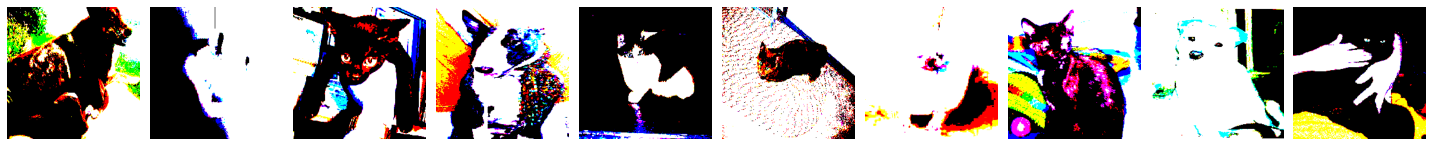

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [14]:
plotImages(imgs)
print(labels)

# Build and Train a CNN

In [15]:
pysical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(pysical_devices))

Num GPUs Available:  0


In [16]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
X_train = train_batches
y_train = train_batches.classes
X_valid = valid_batches
y_valid = valid_batches.classes

In [20]:
model.fit(x=X_train, validation_data=X_valid, epochs=10, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1200 steps, validate for 200 steps
Epoch 1/10
1200/1200 - 388s - loss: 4.2926 - accuracy: 0.6377 - val_loss: 0.6535 - val_accuracy: 0.6690
Epoch 2/10
1200/1200 - 386s - loss: 0.3540 - accuracy: 0.8501 - val_loss: 0.7510 - val_accuracy: 0.6930
Epoch 3/10
1200/1200 - 384s - loss: 0.1497 - accuracy: 0.9463 - val_loss: 0.8810 - val_accuracy: 0.7080
Epoch 4/10
1200/1200 - 384s - loss: 0.0844 - accuracy: 0.9739 - val_loss: 1.1867 - val_accuracy: 0.6740
Epoch 5/10
1200/1200 - 386s - loss: 0.0864 - accuracy: 0.9718 - val_loss: 1.1032 - val_accuracy: 0.7030
Epoch 6/10
1200/1200 - 384s - loss: 0.1020 - accuracy: 0.9664 - val_loss: 1.1682 - val_accuracy: 0.6950
Epoch 7/10
1200/1200 - 383s - loss: 0.0682 - accuracy: 0.9741 - val_loss: 1.2434 - val_accuracy: 0.7060
Epoch 8/10
1200/1200 - 383s - loss: 0.0447 - accuracy: 0.9862 - val_loss: 1.2659 - val_accuracy: 0.7125
Epoch 9/10
1200/1200 - 382s - loss: 0.0526 - accuracy: 0.9845 - val_loss:

# Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

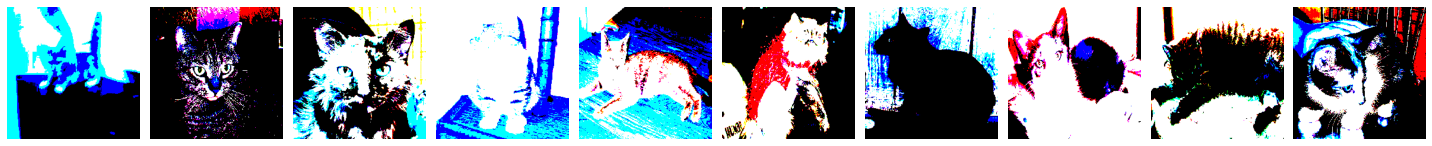

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [21]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [22]:
X_test = test_batches
y_test = test_batches.classes

In [23]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
predictions = model.predict(x=X_test, verbose=2)

600/600 - 54s


In [25]:
rounded_predictions = np.argmax(np.round(predictions), axis=-1)  

In [26]:
y_pred=rounded_predictions

# Confusion Matrix

In [27]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1996 1004]
 [ 816 2184]]


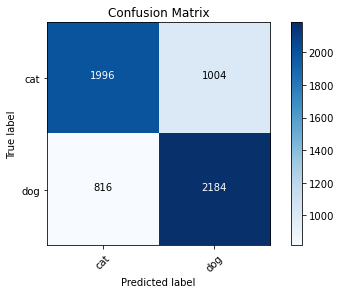

In [29]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [30]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  4180 correct predictions.
 The result is telling us that we have:  1820 incorrect predictions.
 We have a total predictions of:  6000


# Classification Report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      3000
           1       0.69      0.73      0.71      3000

    accuracy                           0.70      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.70      0.70      0.70      6000



In [32]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of the Convolutional Neural Network model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("\nWell, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Convolutional Neural Network model: 69.67%

Well, you got a classification rate of 69.67%


In [33]:
#calculate Precision
print("Precision of the Convolutional Neural Network model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("\nPrecision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Convolutional Neural Network model predicted an image is of dog, that image is actually of dog", "{:.2%}".format(metrics.precision_score(y_test, y_pred)) ,"of the time.")

Precision of the Convolutional Neural Network model: 68.51%

Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Convolutional Neural Network model predicted an image is of dog, that image is actually of dog 68.51% of the time.


In [34]:
#calculate Recall
print("Recall of the Convolutional Neural Network model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("\nRecall: If there is an image of dog present in the test set, our Convolutional Neural Network model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Recall of the Convolutional Neural Network model: 72.80%

Recall: If there is an image of dog present in the test set, our Convolutional Neural Network model can identify it 72.80% of the time.


# ROC AUC Curve

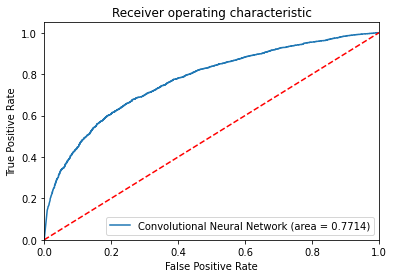

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
cnn_roc_auc = roc_auc_score(y_test, model.predict(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Convolutional Neural Network (area = %0.4f)' % cnn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CNN_ROC')
plt.show()

In [102]:
# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\dog')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train\\dog')
os.chdir('../../')

# Delete data from train directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\train\\cat')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\cat_set')
for i in random.sample(glob.glob('*'), train_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\train\\cat')
os.chdir('../../')

In [103]:
# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\dog')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\valid\\dog')
os.chdir('../../')

# Delete data from valid directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\valid\\cat')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\cat_set')
for i in random.sample(glob.glob('*'), valid_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\valid\\cat')
os.chdir('../../')

In [104]:
# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\dog')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\dog_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\test\\dog')
os.chdir('../../')

# Delete data from test directories
os.chdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\test\\cat')
if os.path.isdir('C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set') is False:
    os.makedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\cat_set')
for i in random.sample(glob.glob('*'), test_n):
    shutil.move(i, 'C:\\Users\\רועי\\data\\dogs-vs-cats\\cat_set')  
os.chdir('../../')
os.removedirs('C:\\Users\רועי\\data\\dogs-vs-cats\\test\\cat')
os.chdir('../../')